In [1]:
from __future__ import print_function

#Basic libraries
import numpy as np
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)
import time

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 20)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
#plt.rcParams['image.cmap'] = 'gray'  # use grayscale 

# Select GPU
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

data_path = '/home/ubuntu/data/training/image/cifar10/'

Tensorflow version:  1.2.1


In [2]:
with open(data_path+'labels.txt') as f:
    categories = f.read().splitlines()
print(categories)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


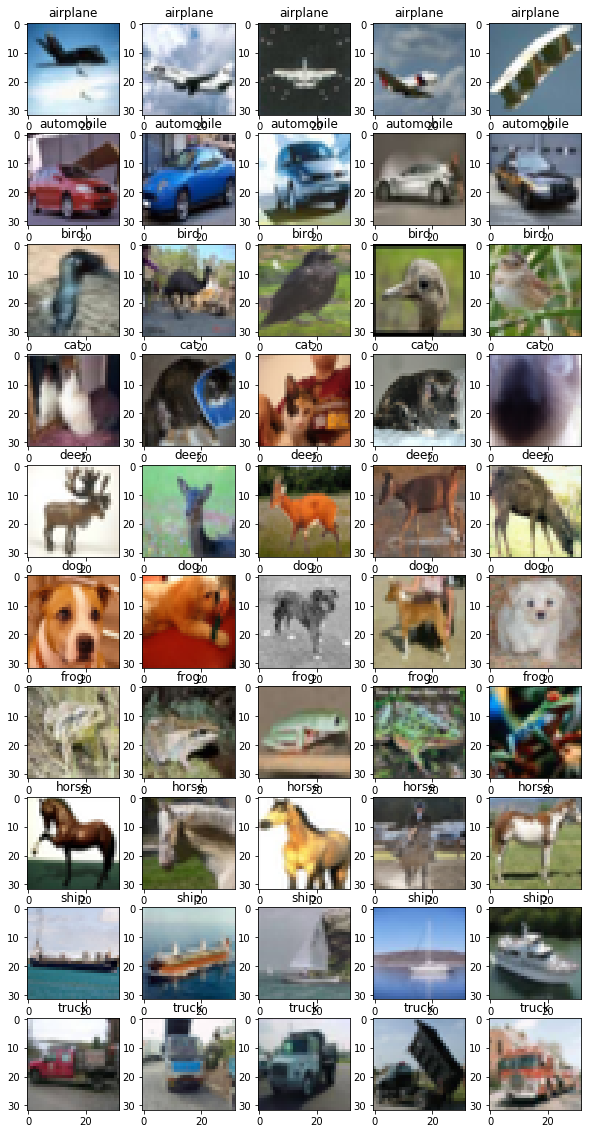

In [3]:
# Examine the data
from os import listdir
from os.path import isfile, join
import random

fig = plt.figure()
n=0
for i, category in enumerate(categories):
    filelist = [f for f in listdir(join(data_path, 'train', category)) if isfile(join(data_path, 'train', category, f))]
    random.shuffle(filelist) # Randomize images
    for f in filelist[:5]: 
        n += 1
        a = fig.add_subplot(10,5,n)
        a.set_title(category)
        img = plt.imread(join(data_path, 'train', category, f))
        plt.imshow(img)
    

    

In [4]:
# First model

from tensorflow.contrib.keras import models, layers, optimizers, callbacks, preprocessing

#Inputs
images = layers.Input(batch_shape=(None, 32, 32, 3), dtype='float32', name='Images')

#First convolutional layer
conv11 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(images)
conv12 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv11)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv12)
pool1d = layers.Dropout(0.25)(pool1)

#Second convolutional layer
conv21 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(pool1d)
conv22 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(conv21)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv22)
pool2d = layers.Dropout(0.25)(pool2)

#Dense layers
flat = layers.Flatten(name='Flat_image')(pool2d)
dense1 = layers.Dense(512, activation='relu', name='Dense_1')(flat)
dense1d = layers.Dropout(0.5)(dense1)
output = layers.Dense(10, activation='softmax', name='Dense_output')(dense1d)


# Model Architecture defined
model1 = models.Model(inputs=images, outputs=output)
model1.summary()


# Select optimizer and compile model
opt = optimizers.RMSprop(lr=0.001, decay=1e-5)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [5]:
nb_train_samples = 50000
nb_test_samples = 10000
epochs = 35
batch_size = 128

In [ ]:
# subtract mean and normalize
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image
X_train /= 128.
X_test /= 128.

In [6]:
# Augmentation for training
train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)

# Augmentation configuration we will use for testing:
# only rescaling
test_datagen = preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    join(data_path, 'train'),
    target_size=(32, 32),
    batch_size=batch_size)


test_generator = test_datagen.flow_from_directory(
    join(data_path, 'test'),
    target_size=(32, 32),
    batch_size=batch_size)


Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


ship


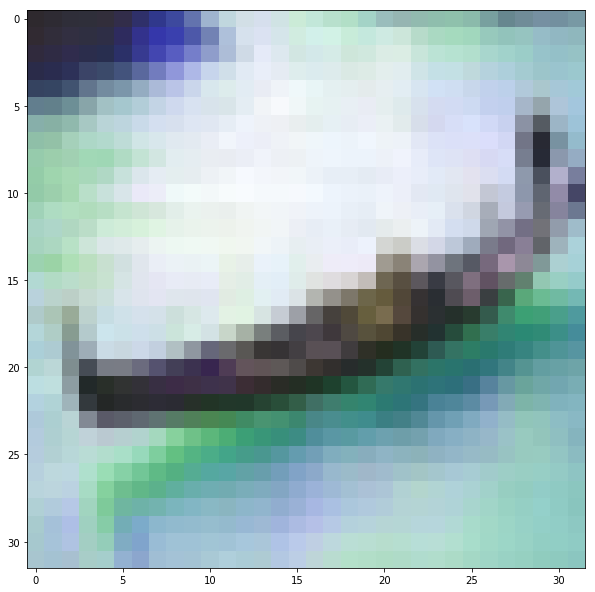

In [7]:
#Chech data generators
gen_data = next(test_generator)
plt.imshow(gen_data[0][1])
print(categories[np.argmax(gen_data[1][1])])

In [8]:
history1 = model1.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = test_generator,
    validation_steps = nb_test_samples // batch_size)


Epoch 1/35
390/390 [==============================] - 41s - loss: 1.9097 - acc: 0.3017 - val_loss: 1.5389 - val_acc: 0.4524
Epoch 2/35
390/390 [==============================] - 37s - loss: 1.5790 - acc: 0.4305 - val_loss: 1.3349 - val_acc: 0.5281
Epoch 3/35
390/390 [==============================] - 37s - loss: 1.4520 - acc: 0.4785 - val_loss: 1.2137 - val_acc: 0.5686
Epoch 4/35
390/390 [==============================] - 37s - loss: 1.3598 - acc: 0.5118 - val_loss: 1.1554 - val_acc: 0.5798
Epoch 5/35
390/390 [==============================] - 37s - loss: 1.3022 - acc: 0.5330 - val_loss: 1.0542 - val_acc: 0.6244
Epoch 6/35
390/390 [==============================] - 38s - loss: 1.2592 - acc: 0.5496 - val_loss: 1.0304 - val_acc: 0.6284
Epoch 7/35
390/390 [==============================] - 38s - loss: 1.2185 - acc: 0.5623 - val_loss: 0.9839 - val_acc: 0.6461
Epoch 8/35
390/390 [==============================] - 38s - loss: 1.1946 - acc: 0.5765 - val_loss: 0.9250 - val_acc: 0.6686
Epoch 9/

KeyboardInterrupt: 

In [ ]:
Epoch 1/50
390/390 [==============================] - 39s - loss: 1.8584 - acc: 0.3170 - val_loss: 1.5811 - val_acc: 0.4217
Epoch 2/50
390/390 [==============================] - 38s - loss: 1.5674 - acc: 0.4290 - val_loss: 1.3067 - val_acc: 0.5248
Epoch 3/50
390/390 [==============================] - 39s - loss: 1.4388 - acc: 0.4806 - val_loss: 1.1817 - val_acc: 0.5900
Epoch 4/50
390/390 [==============================] - 39s - loss: 1.3522 - acc: 0.5176 - val_loss: 1.0862 - val_acc: 0.6144
Epoch 5/50
390/390 [==============================] - 38s - loss: 1.2856 - acc: 0.5443 - val_loss: 1.0279 - val_acc: 0.6388
Epoch 6/50
390/390 [==============================] - 39s - loss: 1.2428 - acc: 0.5567 - val_loss: 0.9835 - val_acc: 0.6503
Epoch 7/50
390/390 [==============================] - 40s - loss: 1.2060 - acc: 0.5714 - val_loss: 0.9419 - val_acc: 0.6649
Epoch 8/50
390/390 [==============================] - 39s - loss: 1.1782 - acc: 0.5813 - val_loss: 0.9142 - val_acc: 0.6754
Epoch 9/50
390/390 [==============================] - 39s - loss: 1.1541 - acc: 0.5903 - val_loss: 0.9800 - val_acc: 0.6600
Epoch 10/50
390/390 [==============================] - 39s - loss: 1.1318 - acc: 0.5998 - val_loss: 0.9110 - val_acc: 0.6793
Epoch 11/50
390/390 [==============================] - 38s - loss: 1.1171 - acc: 0.6053 - val_loss: 0.9140 - val_acc: 0.6731
Epoch 12/50
390/390 [==============================] - 38s - loss: 1.1112 - acc: 0.6081 - val_loss: 0.9307 - val_acc: 0.6718
Epoch 13/50
390/390 [==============================] - 38s - loss: 1.0979 - acc: 0.6158 - val_loss: 0.7996 - val_acc: 0.7201
Epoch 14/50
390/390 [==============================] - 38s - loss: 1.0845 - acc: 0.6219 - val_loss: 0.8366 - val_acc: 0.7089
Epoch 15/50
390/390 [==============================] - 38s - loss: 1.0721 - acc: 0.6284 - val_loss: 0.8764 - val_acc: 0.6936
Epoch 16/50
390/390 [==============================] - 38s - loss: 1.0736 - acc: 0.6244 - val_loss: 0.9092 - val_acc: 0.6894
Epoch 17/50
390/390 [==============================] - 38s - loss: 1.0558 - acc: 0.6323 - val_loss: 0.9152 - val_acc: 0.6940
Epoch 18/50
390/390 [==============================] - 39s - loss: 1.0588 - acc: 0.6324 - val_loss: 0.8212 - val_acc: 0.7143
Epoch 19/50
390/390 [==============================] - 38s - loss: 1.0589 - acc: 0.6332 - val_loss: 0.7814 - val_acc: 0.7303
Epoch 20/50
390/390 [==============================] - 39s - loss: 1.0434 - acc: 0.6368 - val_loss: 0.8396 - val_acc: 0.7182
Epoch 21/50
390/390 [==============================] - 39s - loss: 1.0424 - acc: 0.6375 - val_loss: 0.7533 - val_acc: 0.7364
Epoch 22/50
390/390 [==============================] - 39s - loss: 1.0469 - acc: 0.6377 - val_loss: 0.7786 - val_acc: 0.7301
Epoch 23/50
390/390 [==============================] - 38s - loss: 1.0411 - acc: 0.6387 - val_loss: 0.8021 - val_acc: 0.7239
Epoch 24/50
390/390 [==============================] - 38s - loss: 1.0415 - acc: 0.6384 - val_loss: 0.8514 - val_acc: 0.7142
Epoch 25/50
390/390 [==============================] - 39s - loss: 1.0416 - acc: 0.6411 - val_loss: 0.8121 - val_acc: 0.7222
Epoch 26/50
390/390 [==============================] - 38s - loss: 1.0298 - acc: 0.6457 - val_loss: 0.7915 - val_acc: 0.7268
Epoch 27/50
390/390 [==============================] - 38s - loss: 1.0303 - acc: 0.6407 - val_loss: 0.7368 - val_acc: 0.7454
Epoch 28/50
390/390 [==============================] - 38s - loss: 1.0287 - acc: 0.6457 - val_loss: 0.7868 - val_acc: 0.7278
Epoch 29/50
390/390 [==============================] - 38s - loss: 1.0245 - acc: 0.6461 - val_loss: 0.9133 - val_acc: 0.7059
Epoch 30/50
390/390 [==============================] - 38s - loss: 1.0377 - acc: 0.6411 - val_loss: 0.7983 - val_acc: 0.7264
Epoch 31/50
390/390 [==============================] - 38s - loss: 1.0198 - acc: 0.6462 - val_loss: 0.7297 - val_acc: 0.7486
Epoch 32/50
390/390 [==============================] - 38s - loss: 1.0320 - acc: 0.6443 - val_loss: 0.7498 - val_acc: 0.7447
Epoch 33/50
390/390 [==============================] - 38s - loss: 1.0143 - acc: 0.6513 - val_loss: 0.8098 - val_acc: 0.7200
Epoch 34/50
390/390 [==============================] - 39s - loss: 1.0209 - acc: 0.6500 - val_loss: 0.8091 - val_acc: 0.7213
Epoch 35/50
390/390 [==============================] - 38s - loss: 1.0255 - acc: 0.6484 - val_loss: 0.7660 - val_acc: 0.7414
Epoch 36/50
390/390 [==============================] - 38s - loss: 1.0215 - acc: 0.6475 - val_loss: 0.7535 - val_acc: 0.7430
Epoch 37/50
390/390 [==============================] - 38s - loss: 1.0210 - acc: 0.6504 - val_loss: 0.7637 - val_acc: 0.7386
Epoch 38/50
390/390 [==============================] - 38s - loss: 1.0119 - acc: 0.6519 - val_loss: 0.9143 - val_acc: 0.6985
Epoch 39/50
390/390 [==============================] - 38s - loss: 1.0199 - acc: 0.6540 - val_loss: 0.7379 - val_acc: 0.7442
Epoch 40/50
390/390 [==============================] - 38s - loss: 1.0182 - acc: 0.6484 - val_loss: 0.7890 - val_acc: 0.7297
Epoch 41/50
390/390 [==============================] - 38s - loss: 1.0127 - acc: 0.6493 - val_loss: 0.8440 - val_acc: 0.7264
Epoch 42/50
390/390 [==============================] - 39s - loss: 1.0118 - acc: 0.6526 - val_loss: 0.8848 - val_acc: 0.7068
Epoch 43/50
390/390 [==============================] - 38s - loss: 1.0131 - acc: 0.6532 - val_loss: 0.8198 - val_acc: 0.7176
Epoch 44/50
390/390 [==============================] - 39s - loss: 1.0263 - acc: 0.6468 - val_loss: 0.7689 - val_acc: 0.7427
Epoch 45/50
390/390 [==============================] - 38s - loss: 1.0221 - acc: 0.6483 - val_loss: 0.7448 - val_acc: 0.7444
Epoch 46/50
390/390 [==============================] - 38s - loss: 1.0179 - acc: 0.6519 - val_loss: 0.8180 - val_acc: 0.7214
Epoch 47/50
390/390 [==============================] - 38s - loss: 1.0179 - acc: 0.6561 - val_loss: 0.7368 - val_acc: 0.7484
Epoch 48/50
390/390 [==============================] - 38s - loss: 1.0142 - acc: 0.6536 - val_loss: 0.8381 - val_acc: 0.7183
Epoch 49/50
390/390 [==============================] - 38s - loss: 1.0116 - acc: 0.6546 - val_loss: 0.7914 - val_acc: 0.7294
Epoch 50/50
390/390 [==============================] - 38s - loss: 1.0178 - acc: 0.6508 - val_loss: 0.8406 - val_acc: 0.7194

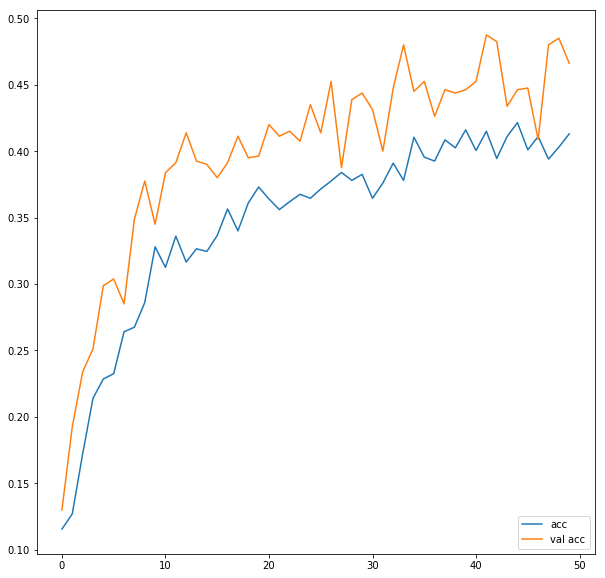

In [15]:
# Plot history
plt.rcParams['figure.figsize'] = (10, 10)        # size of images

plt.plot(history1.history['acc'], label='acc')
plt.plot(history1.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()